In [1]:
from pandas import pandas as pd
import numpy as np

In [2]:
# it reads dataset from csv - dataset fiels using pandas libarary
dataset= pd.read_csv("50_Startups.csv")

In [3]:
#Python AI algorithm does not handle categorical columns data in dataset directly. In order to convert it to a meaningful no/data which python AI algorithm understands, the method get_dummies used. Here the column is "State"
# Since the column data falls under nominal - categorical data which can not be compared amoung. So during the conversion the method one hot encoding is used. Columns will expanded into no of unique categorical data.
#As duplicated data could lead to decrease in model prcediction performance , we need to remove duplicated columns entires using drop_first=True ( first column of expanded nominal data columns will be dropped).abs
#dtype=int specifies the data type to which the category column data will be converted. dtype is  bool by default.
dataset = pd.get_dummies(dataset,dtype=int,drop_first=True)

In [4]:
#Folllowing command is to get the columns list which is available in the ddataset
dataset.columns

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'Profit',
       'State_Florida', 'State_New York'],
      dtype='object')

In [5]:
#Splitting dataset into input and output variable  
#Dependant variable ie out put
dependant = dataset[["Profit"]]

In [6]:
#All dependant variable ie input put
independant = dataset[['R&D Spend', 'Administration', 'Marketing Spend','State_Florida', 'State_New York']]

In [7]:
# To separate train and test set. The below library used.
from sklearn.model_selection import train_test_split

In [8]:
#Spliting train sets and test sets passing dependant and independant datasets will be passed to the funciotn..
#Train data sets and Test data sets will be assigned to respective varaibles below mentioned
X_Train, X_Test, Y_Train,Y_Test = train_test_split(independant,dependant,test_size=0.3,random_state=0)

criterion:absolute_error - split:best - feature:sqrt - r_sqr: 0.29127411133473846


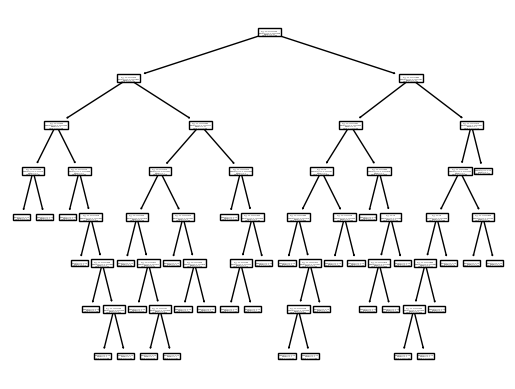

criterion:absolute_error - split:best - feature:log2 - r_sqr: -0.07864583239612744


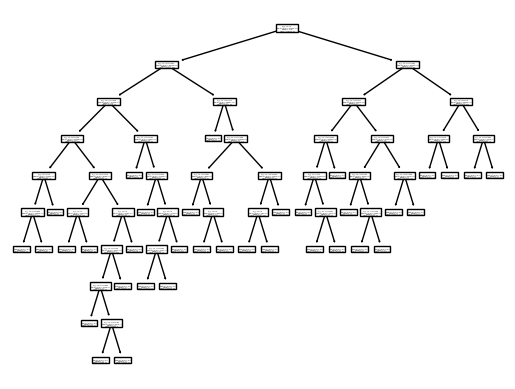

criterion:absolute_error - split:random - feature:sqrt - r_sqr: 0.8163391559879364


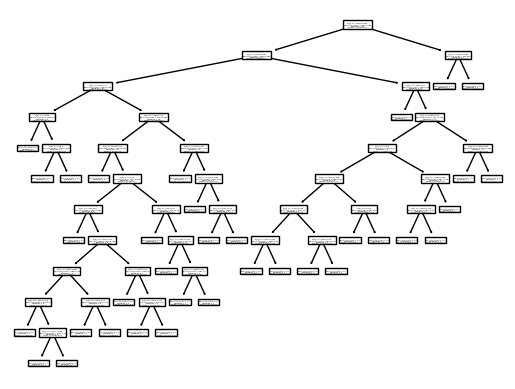

criterion:absolute_error - split:random - feature:log2 - r_sqr: 0.44281480377291516


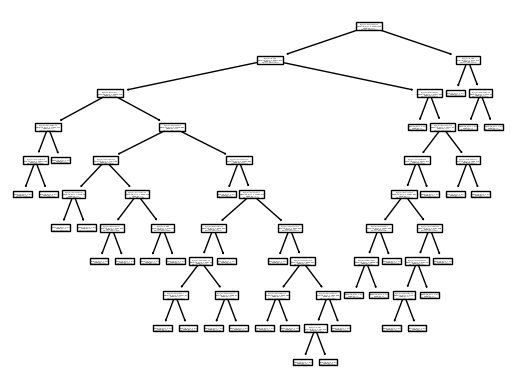

criterion:squared_error - split:best - feature:sqrt - r_sqr: 0.5761412893635991


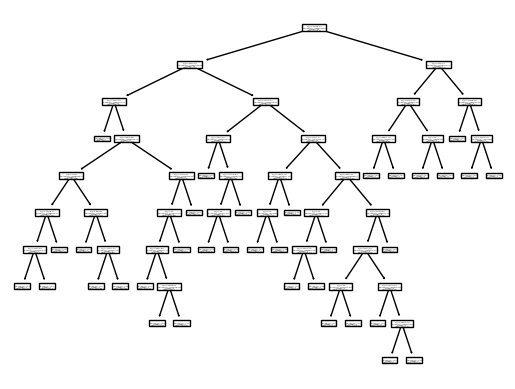

criterion:squared_error - split:best - feature:log2 - r_sqr: 0.6649784720683447


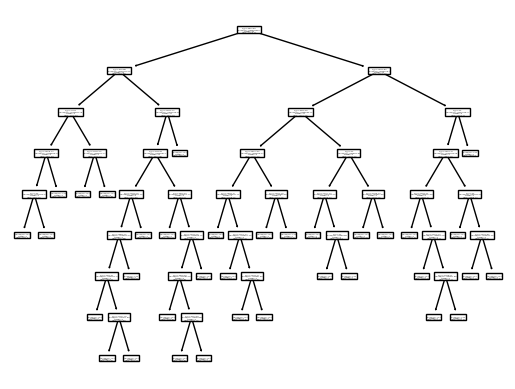

criterion:squared_error - split:random - feature:sqrt - r_sqr: 0.8980556711560506


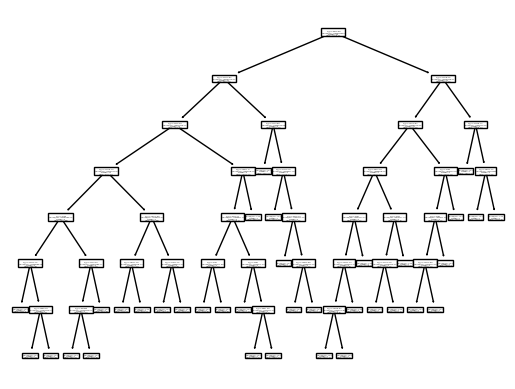

criterion:squared_error - split:random - feature:log2 - r_sqr: 0.15077540060156047


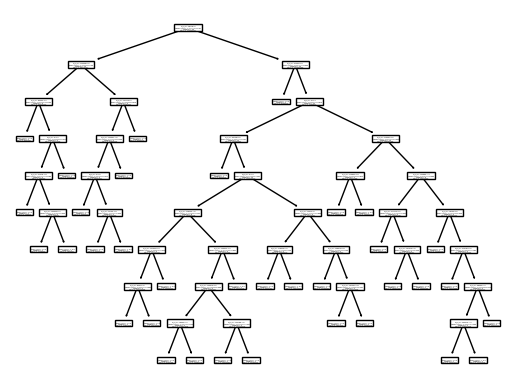

criterion:friedman_mse - split:best - feature:sqrt - r_sqr: 0.06922380169200049


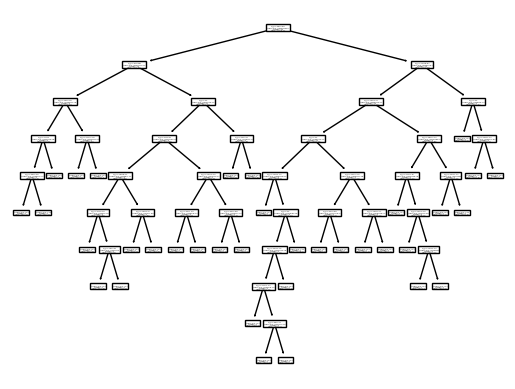

criterion:friedman_mse - split:best - feature:log2 - r_sqr: 0.44834477897015124


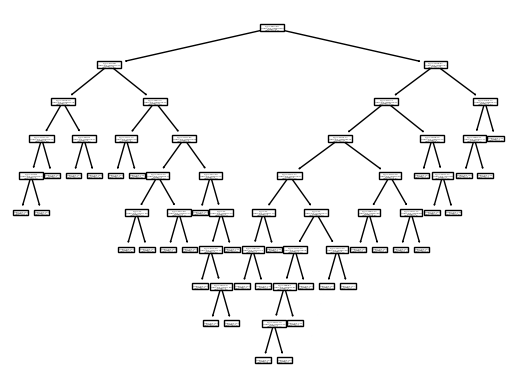

criterion:friedman_mse - split:random - feature:sqrt - r_sqr: 0.8180741753263797


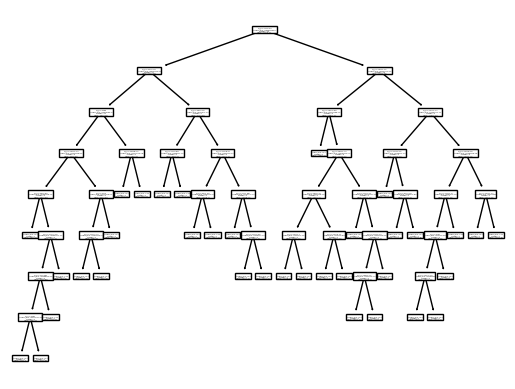

criterion:friedman_mse - split:random - feature:log2 - r_sqr: 0.5995738215001178


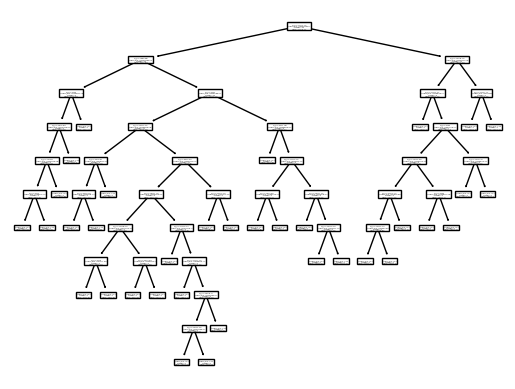

criterion:poisson - split:best - feature:sqrt - r_sqr: 0.8964552578876935


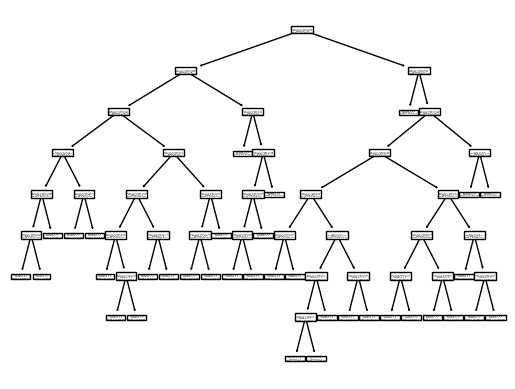

criterion:poisson - split:best - feature:log2 - r_sqr: 0.40201817161566533


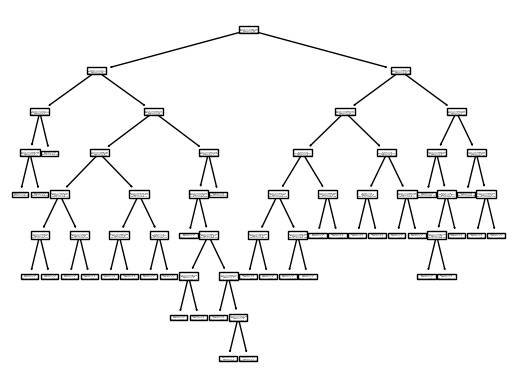

criterion:poisson - split:random - feature:sqrt - r_sqr: 0.6763198392271768


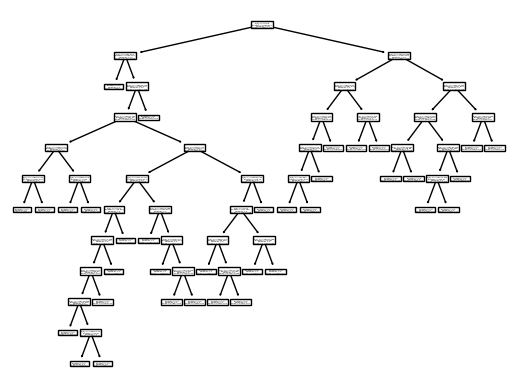

criterion:poisson - split:random - feature:log2 - r_sqr: 0.3687110603826199


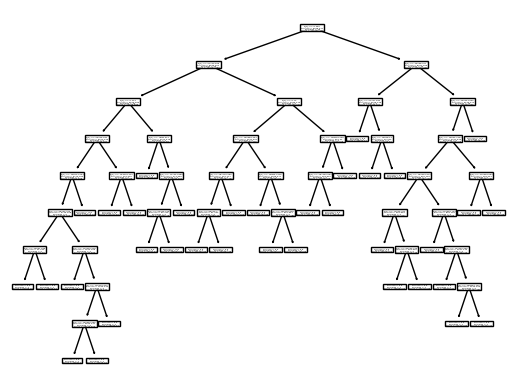

+----+----------------+------------+----------------+------------+
|    | criterion      | splitter   | max_features   |      r_sqr |
|----+----------------+------------+----------------+------------|
|  0 | absolute_error | best       | sqrt           |  0.291274  |
|  1 | absolute_error | best       | log2           | -0.0786458 |
|  2 | absolute_error | random     | sqrt           |  0.816339  |
|  3 | absolute_error | random     | log2           |  0.442815  |
|  4 | squared_error  | best       | sqrt           |  0.576141  |
|  5 | squared_error  | best       | log2           |  0.664978  |
|  6 | squared_error  | random     | sqrt           |  0.898056  |
|  7 | squared_error  | random     | log2           |  0.150775  |
|  8 | friedman_mse   | best       | sqrt           |  0.0692238 |
|  9 | friedman_mse   | best       | log2           |  0.448345  |
| 10 | friedman_mse   | random     | sqrt           |  0.818074  |
| 11 | friedman_mse   | random     | log2           |  0.59957

In [64]:
#To import LeearRegression class
from sklearn  import tree
from sklearn.tree  import DecisionTreeRegressor 
from sklearn.metrics import r2_score
import matplotlib.pylab as plt
#import random as rd;
#An object DecisionTree  is created and assigned to Regressor
lst = [[]]
criterions = {'squared_error', 'friedman_mse', 'absolute_error', 'poisson'}
splitters = {'best', 'random'}
max_features = {'sqrt', 'log2'}
#rvalues = rd.random()
for critrn in criterions:    
    for split in splitters:
        for feature in max_features:                         
            #print(f'criterion - split - feature : {critrn},{split},{feature}')
            Regressor = DecisionTreeRegressor(criterion= critrn,splitter=split,max_features=feature)
            #Creates the AI model here with Train data sets
            Regressor.fit(X_Train,Y_Train)
            tree.plot_tree(Regressor)
            #plt.show()                
            Y_Predict = Regressor.predict(X_Test)
            # libarary to calculae prediction metrics 2 score        
            #r_scroe callculated and assigned to a variable
            r_sqr = r2_score(Y_Test,Y_Predict)
            #r_sqr
            lst.append([critrn,split,feature,r_sqr])
            print(f'criterion:{critrn} - split:{split} - feature:{feature} - r_sqr: {r_sqr}') 
            plt.show()  
del lst[0]
df = pd.DataFrame(lst, columns =['criterion', 'splitter','max_features','r_sqr']) 
#print(df)
from io import StringIO
from tabulate import tabulate
print(tabulate(df, headers='keys', tablefmt='psql'))
maxdmodel_r_sqr = df.max()
# Get the rows where 'r_sqr' equals the maximum value
maxval =maxdmodel_r_sqr['r_sqr']
matching_rows = df[df['r_sqr'] == maxval]
print( f'Best fit at {matching_rows["r_sqr"].values} in the run- model combination is criterion:{matching_rows["criterion"].values}, splitter:{matching_rows["splitter"].values},max_features:{matching_rows["max_features"].values}' )     

